In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, io, filters
from skimage.segmentation import watershed
from skimage.filters import sobel
from skimage.measure import label, regionprops

In [11]:
#get predictions for specified year
year = '2020'
data = np.load('/home/esther/shared/preds_' + year + '.npz')
date_loc_list = list(data)
print(date_loc_list)

['2020-03-02_grassmtn', '2020-03-04_antelope', '2020-03-04_elsinore', '2020-03-09_elsinore', '2020-03-12_grassmtn', '2020-03-19_antelope', '2020-03-22_grassmtn', '2020-03-27_grassmtn', '2020-03-29_antelope', '2020-03-29_elsinore', '2020-04-01_grassmtn', '2020-04-03_antelope', '2020-04-03_elsinore', '2020-04-11_grassmtn', '2020-04-13_antelope', '2020-04-16_grassmtn', '2020-04-18_antelope', '2020-04-21_grassmtn', '2020-04-23_antelope', '2020-04-23_elsinore', '2020-04-26_grassmtn', '2020-04-28_antelope', '2020-04-28_elsinore']


In [12]:
areas_dict = {}
centroids_dict = {}

for key in date_loc_list:

    #pull prediction
    preds = data[key]

    #apply gaussian blur to predictions
    tmp = filters.gaussian(preds, sigma=10)

    #get markers of poppy and no poppy
    markers = np.zeros_like(tmp)
    markers[tmp > 0.1] = 1 #note: changed this and need to update files
    markers[tmp > 0.5] = 2

    #generate elevation map
    elevation_map = sobel(tmp)

    #segment the image
    segmentation = watershed(elevation_map, markers)

    #get labels of segments
    labeled = label(segmentation)

    #get list of all areas in this image
    areas_list = [region.area for region in regionprops(labeled)]
    centroids_list = [region.centroid for region in regionprops(labeled)]

    #store in dictionary
    areas_dict[key] = areas_list
    centroids_dict[key] = centroids_list

print(areas_dict)

{'2020-03-02_grassmtn': [640338], '2020-03-04_antelope': [569449], '2020-03-04_elsinore': [823250], '2020-03-09_elsinore': [823250], '2020-03-12_grassmtn': [640338], '2020-03-19_antelope': [569449], '2020-03-22_grassmtn': [640338], '2020-03-27_grassmtn': [640338], '2020-03-29_antelope': [569449], '2020-03-29_elsinore': [823250], '2020-04-01_grassmtn': [640338], '2020-04-03_antelope': [532289, 2805, 851, 16813, 1820, 6257, 8554, 60], '2020-04-03_elsinore': [823250], '2020-04-11_grassmtn': [640338], '2020-04-13_antelope': [515260, 8042, 6653, 1679, 7365, 1548, 1450, 1685, 831, 4446, 1337, 1617, 16132, 604, 650, 150], '2020-04-16_grassmtn': [640338], '2020-04-18_antelope': [564199, 693, 790, 3767], '2020-04-21_grassmtn': [640338], '2020-04-23_antelope': [393647, 21303, 107001, 2015, 1171, 1534, 501, 2723, 27386, 3463, 1562, 1214, 680, 3564, 528, 821, 336], '2020-04-23_elsinore': [823250], '2020-04-26_grassmtn': [640338], '2020-04-28_antelope': [473324, 35983, 2852, 1060, 8516, 1423, 3690,

In [35]:
#save as npz
np.savez('/home/esther/poppy-finder/data/areas_' + year, **areas_dict)
np.savez('/home/esther/poppy-finder/data/centroids_' + year, **centroids_dict)

## Code below is to visualize segmentation process for an individual image

In [13]:
#get images for visualization
imgs_list = []
for name in date_loc_list:
    
    filename = '/home/esther/shared/' + name + '.npy'
    img = np.load(filename)
    imgs_list.append(img)

In [30]:
n = 21
key = date_loc_list[n]
preds = data[key]

#apply gaussian blur to predictions
tmp = filters.gaussian(preds, sigma=10)

#get markers of poppy and no poppy
markers = np.zeros_like(tmp)
markers[tmp > 0.1] = 1
markers[tmp > 0.5] = 2

#generate elevation map
elevation_map = sobel(tmp)

#segment
segmentation = watershed(elevation_map, markers)

#get labels of segments
labeled = label(segmentation)

#get list of all areas in this image
areas_list = [region.area for region in regionprops(labeled)]
centroids_list = [region.centroid for region in regionprops(labeled)]

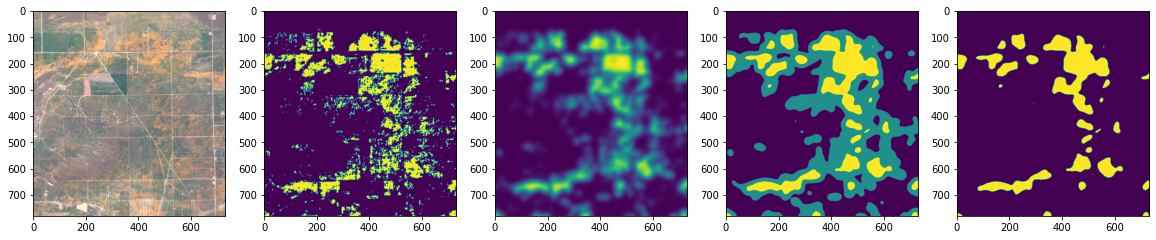

In [33]:
#visualize
fig, axs = plt.subplots(1,5, figsize=(20,4))
axs[0].imshow(np.minimum(imgs_list[n][:,:,[3,2,1]]*5, 1))
axs[1].imshow(preds)
axs[2].imshow(tmp)
axs[3].imshow(markers)
#axs[3].imshow(elevation_map)
axs[4].imshow(segmentation);

In [34]:
centroids_list

[(394.4751089121482, 361.95969456986643),
 (118.14315181518151, 233.1023102310231),
 (220.87839978430117, 454.3426578140272),
 (132.56199460916443, 170.0256064690027),
 (137.88235294117646, 555.4117647058823),
 (186.98913412563667, 131.05195246179966),
 (194.04834905660377, 15.287735849056604),
 (186.88108539505188, 284.45570630486833),
 (220.7154888319297, 189.0523617722446),
 (252.20631578947368, 717.2631578947369),
 (278.21955719557195, 565.8118081180812),
 (286.86619718309856, 164.35211267605635),
 (339.95767195767195, 546.7142857142857),
 (354.4, 289.8),
 (434.5947630922693, 483.1452618453865),
 (445.05383734249716, 605.0148911798397),
 (456.6845637583893, 533.7046979865772),
 (486.81310679611653, 490.86650485436894),
 (528.8797169811321, 499.3938679245283),
 (581.9644385026738, 467.26176470588234),
 (597.1546417759838, 571.9563572149344),
 (656.8573420074349, 221.9121747211896),
 (663.0092961487384, 717.6733067729084),
 (664.1267409470752, 473.45961002785515),
 (771.0068493150685